In [1]:
from tensorflow import keras

## Ejemplo: clasificador de imágenes usando Keras

Para ilustrar la manera en que Keras es usado en el aprendizaje profundo, realizaremos un ejemplo de clasificación usando conjunto de datos *Fashion MNIST* el cual consta de 70,000 imágenes (las imágenes representan artículos de moda) en escala de grises de 28 × 28 píxeles cada una y con 10 clases. 

### Uso de Keras para cargar el conjunto de datos

Comencemos cargando el conjunto de datos Fashion MNIST. Keras tiene una serie de funciones para cargar conjuntos de datos populares en keras.datasets. El conjunto de datos ya está dividido entre un conjunto de entrenamiento y un conjunto de prueba, pero puede ser útil dividir aún más el conjunto de entrenamiento para tener un conjunto de validación:






In [2]:
from keras.datasets import fashion_mnist

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Muestra el tamaño de la muestra de X_train y el tipo de datos (dtype)

(60000, 28, 28)

A continuación visualiza utilizando `matplotlib` muestra el primer elemento del conjunto de entrenamiento usando el comando de matplotlib imshow

In [ ]:
import matplotlib.pyplot as plt 
# import seaborn as sns; sns.set()

**Ahora** divide el conjunto de datos de entrenamiento en un conjunto de validación y un conjunto de entrenamiento (más pequeño). Para ello coge las 5000 primeras muestras de datos para el dataset de validación y las siguientes para entrenamiento.
Aprovecha y normaliza todos los sets de datos con 255.

Visualiza de nuevo la primera imagen del conjunto de datos usando imshow con el parámetro cmap="binary" y calculemos el máximo y mínimo para comprobar que hemos escalado bién. Comprueba además que los datos son de tipo `float`

Las etiquetas van de 0 a 9, por lo que hay 10 tipos diferentes de ropa. Comprueba analitacamente que efectivamente, el vector `y_train` solamente tiene valores entre 0 y 9.

Los nombres para cada una de las clases anteriores son: 

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Por lo tanto, la clase 0 se corresponde con "T-shirt/top", la clase 1 con "Trouser" y así sucesivamente.

Comprueba que la primera imagen en el conjunto de entrenamiento es un abrigo (Coat)

El conjunto de validación contiene 5,000 imágenes, y el conjunto de test contiene 10,000 imágenes. Comprueba las dimensiones de dichos conjuntos.

(5000, 28, 28)

(10000, 28, 28)

visualicemos ahora algunas de las imágenes de los datos de entrenamiento con su respectiva etiqueta

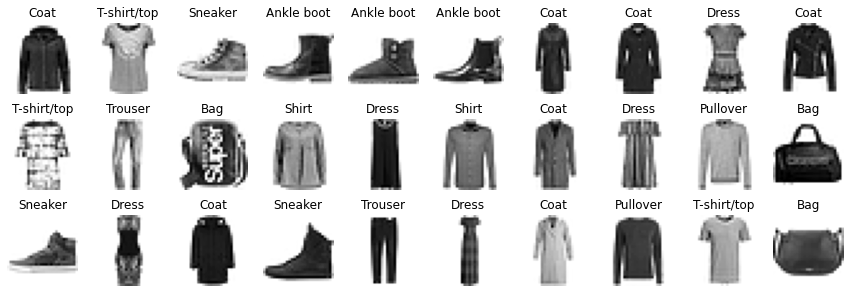

In [ ]:
fig , ax =  plt.subplots(3,10, figsize=(15,5))
for i , ax in enumerate(ax.flat):
  ax.imshow(X_train[i], cmap='binary')
  ax.set_axis_off()
  ax.set_title(class_names[y_train[i]])

## Uso de Keras para crean un modelo de aprendizaje profundo 


In [ ]:
keras.backend.clear_session()

Crea un modelo con la api de keras que tenga 2 capas ocultas de 300 y 100 neuronas respectivamente con función de activación *Relu*, excepto la última capa que tiene que ser *softmax*)

In [ ]:
model = keras.models.Sequential();
# primera layer tiene que ser Flatten

Utiliza el método `summary()`para visualizar el resumen de las capas y parámetros del modelo creado. Tiene que quedar así:
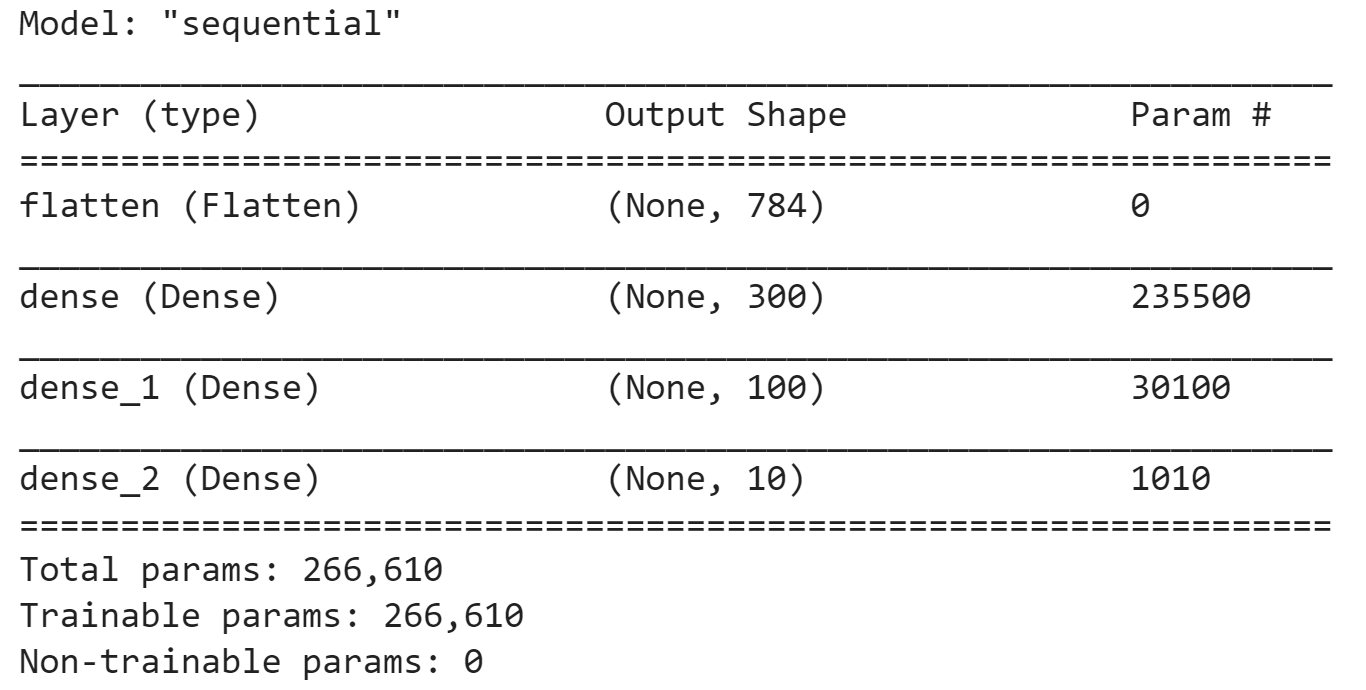

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Compilando el modelo

Después de crear un modelo, se debe llamar el método `compile()` para especificar la función de pérdida y el optimizador a utilizar. Opcionalmente, también puede especificar una lista de métricas  para calcular durante el entrenamiento y la evaluación. Compila el modelo con los siguientes parámetros:
- loss='sparse_categorical_crossentropy',
- optimizer='sgd', 
- metrics=["accuracy"]

## Entrenando y evaluando el modelo

Ahora el modelo está listo para ser entrenado. Para esto simplemente necesitamos llamar a su método `fit()`. Le pasamos las características de entrada (X_train) y las clases de destino (y_train), así como la cantidad de épocas para entrenar (o de lo contrario, sería predeterminado a solo 1). En nuestro caso queremos que sean 20. También pasamos un conjunto de validación como validation_data=(X_valid, y_valid) (esto suele ser opcional): Keras medirá la pérdida y las métricas adicionales en este conjunto al final de cada época, lo cual es muy útil para ver qué tan bien se desempeña realmente el modelo. Haz el `fit` del modelo y guárdalo en una variable llamada `history`.

In [ ]:
history =  None#

¡Y eso es todo! La red neuronal está entrenada. En cada época durante el entrenamiento, Keras muestra el número de instancias procesadas hasta el momento (junto con una barra de progreso), el tiempo medio de entrenamiento, la pérdida (loss) y la precisión (accuracy), ambas calculadas en el conjunto de entrenamiento y el conjunto de validación.

El método `fit()` devuelve un objeto "History" que contiene los parámetros de entrenamiento (history.params), la lista de épocas por las que pasó (history.epoch) y, lo más importante, un diccionario (history.history) que contiene la pérdida y las métricas adicionales que midió al final de cada época en el conjunto de entrenamiento y en el conjunto de validación (si corresponde). 

Visualiza las curvas de aprendizaje guardadas en la variable `history` (creada anteriormente).

In [ ]:
import pandas as pd

In [ ]:
df=pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.720276,0.765618,0.515778,0.8256
1,0.489612,0.827473,0.463811,0.8378
2,0.445222,0.843291,0.416071,0.8592
3,0.419063,0.852000,0.445251,0.8428
4,0.397743,0.859800,0.384666,0.8654


In [ ]:
# haz un plot de las figuras de aprendizaje


Se puede ver que tanto la precisión de entrenamiento como la de validación aumentan constantemente durante el entrenamiento, mientras que la pérdida de entrenamiento y validación disminuye. Ademas , las curvas de validación están bastante cerca de las curvas de entrenamiento, lo que significa que no hay demasiado sobreajuste(overfitting).

Ahora usemos el modelo ya entrenado sobre nuestros datos de prueba (X_test).
Para ello usa la función model.evaluate sobre los datos de test

## Usando el modelo para hacer predicciones

Ahora, podemos usar el método `predict()` para hacer predicciones sobre nuevas instancias. Como no tenemos instancias nuevas reales, solo usaremos las primeras 3 instancias del conjunto de test:

In [ ]:
X_new = X_test[:3]
# haz la predicción sobre X_new

array([[0.1 , 0.02, 0.07, 0.14, 0.01, 0.39, 0.12, 0.1 , 0.03, 0.01],
       [0.11, 0.02, 0.07, 0.14, 0.02, 0.36, 0.13, 0.1 , 0.03, 0.01],
       [0.11, 0.03, 0.07, 0.15, 0.01, 0.36, 0.13, 0.1 , 0.03, 0.01]],
      dtype=float32)

¿Cómo interpretas las salida devuelta al predecir? ¿Cómo llevas este resultado a la clase correspondiente (Google - multi-clase)?

array([9, 2, 1])

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

array([9, 2, 1], dtype=uint8)

Representa visualmente los datos de entrada para comprobar que las predicciones son correcta.

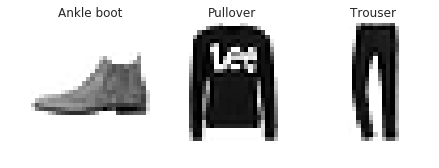

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)